In [1]:
#@markdown This cell prints the present working directory of your file. This is the base of where the code is run.
!pwd

/content


In [6]:
#@markdown This cell assigns the variable data_file_path with the location of where the data was collected. It may be necessary to modify this if the data is located in a different file path.
data_file_path = "/content/drive/MyDrive/Research/Berkeley-France/Software/PlasmaGun/data/"

In [16]:
#@markdown This cell loads the appropriate Python packages to view the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

In [12]:
timestamp = "2022_10_31_17h57m56s"
df_from_csv = pd.read_csv(data_file_path+timestamp+f"/{timestamp}_spectra_data.csv", on_bad_lines='skip',header=3)
df_from_h5 = pd.read_hdf(data_file_path+timestamp+"/data.h5")
print(df_from_csv)
print('========================================================================')
print(df_from_h5)

    Unnamed: 0          0            1            2            3            4  \
0            0   197.9713   198.452033   198.932737   199.413413   199.894061   
1            1  3751.0000  2550.000000  2760.000000  2711.000000  2868.000000   
2            2   197.9713   198.452033   198.932737   199.413413   199.894061   
3            3  3755.0000  2550.000000  2763.000000  2710.000000  2862.000000   
4            4   197.9713   198.452033   198.932737   199.413413   199.894061   
5            5  3755.0000  2551.000000  2762.000000  2712.000000  2857.000000   
6            6   197.9713   198.452033   198.932737   199.413413   199.894061   
7            7  3758.0000  2557.000000  2766.000000  2716.000000  2870.000000   
8            8   197.9713   198.452033   198.932737   199.413413   199.894061   
9            9  3749.0000  2553.000000  2764.000000  2717.000000  2859.000000   
10          10   197.9713   198.452033   198.932737   199.413413   199.894061   
11          11  3750.0000  2

In [27]:
timestamp = "2022_10_31_17h54m09s"
df_skin = pd.read_hdf(data_file_path+timestamp+"/data.h5")
print(df_skin)

         0            1            2            3            4           5     \
0    197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
1   3753.0000  2554.000000  2758.000000  2706.000000  2857.000000  2852.00000   
2    197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
3   3750.0000  2549.000000  2760.000000  2715.000000  2867.000000  2865.00000   
4    197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
5   3759.0000  2555.000000  2762.000000  2718.000000  2875.000000  2864.00000   
6    197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
7   3749.0000  2551.000000  2760.000000  2714.000000  2872.000000  2870.00000   
8    197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
9   3754.0000  2550.000000  2756.000000  2708.000000  2869.000000  2863.00000   
10   197.9713   198.452033   198.932737   199.413413   199.894061   200.37468   
11  3752.0000  2555.000000  

In [28]:
wavelengths = df_from_h5.iloc[::2]
intensities = df_from_h5.iloc[1::2]
w_skin = df_skin.iloc[::2]
i_skin = df_skin.iloc[1::2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  """


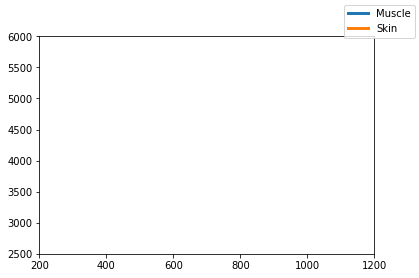

In [41]:
fig = plt.figure()
ax = plt.axes(xlim=(200, 1200), ylim=(2500, 6000))
line, = ax.plot([], [], lw=3, label="Muscle")
line2, = ax.plot([], [], lw=3, label="Skin")
fig.legend(loc="best")

def init():
    line.set_data([], [])
    line2.set_data([], [])
    return line,line2,
def animate(i):
    ax.set_title(f't = {i} s')
    x = np.asarray(wavelengths.iloc[i])
    y = np.asarray(intensities.iloc[i])
    line.set_data(x,y)
    x = np.asarray(w_skin.iloc[i])
    y = np.asarray(i_skin.iloc[i])
    line2.set_data(x,y)
    return line,line2,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=10, interval=100, blit=True)

In [43]:
anim